In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from helper_functions import getDistanceByPoint

In [8]:
# Read the features dataset
dataset = pd.read_csv("with-new-features.csv")
dataset

,Id,ActivityMinute,Calories,Steps,Heartrate,is_morning,is_daytime,is_evening,is_sleep
0,2022484408,2016-04-12 07:21:00,3.32064,17,97.0,1,0,0,0
1,2022484408,2016-04-12 07:23:00,1.34901,0,60.0,1,0,0,0
2,2022484408,2016-04-12 07:24:00,1.03770,0,58.0,1,0,0,0
3,2022484408,2016-04-12 07:26:00,2.49048,7,53.0,1,0,0,0
4,2022484408,2016-04-12 07:27:00,1.03770,0,53.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
200068,8877689391,2016-05-12 12:23:00,8.24364,97,100.0,0,1,0,0
200069,8877689391,2016-05-12 12:24:00,8.24364,101,97.0,0,1,0,0
200070,8877689391,2016-05-12 12:25:00,7.75872,101,93.0,0,1,0,0
200071,8877689391,2016-05-12 13:54:00,1.33353,0,63.0,0,1,0,0


In [9]:
# Take useful feature and standardize thems
data = dataset[['Calories', 'Steps', 'Heartrate', 'is_morning', 'is_daytime','is_evening', 'is_sleep']]
min_max_scaler = StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# reduce to 2 importants features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
# standardize these 2 new features
min_max_scaler = StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
data

,0,1
0,0.682838,1.062160
1,-0.753331,0.958633
2,-0.858807,0.948992
3,-0.553457,1.009952
4,-0.962115,0.948681
...,...,...
200068,3.288508,-0.735807
200069,3.288967,-0.726358
200070,3.106390,-0.741430
200071,-0.414228,-1.183014


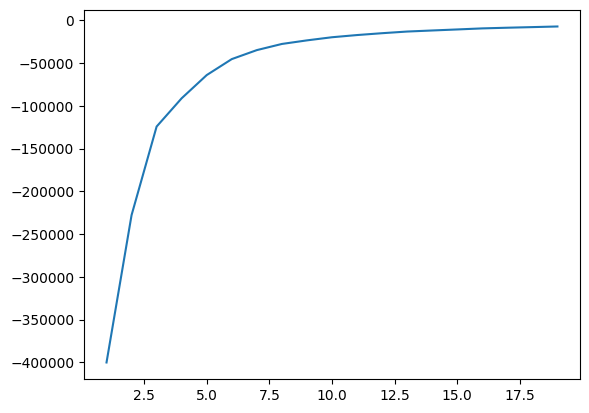

In [10]:
# calculate with different number of centroids to see the loss plot (elbow method)
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [11]:
data.shape
data_with_index = data.set_index(dataset.index)

In [14]:
# Not clear for me, I choose 10 centroids arbitrarily and add these data to the central dataframe
dataset['cluster'] = kmeans[10].predict(data)
dataset['principal_feature1'] = data_with_index[0]
dataset['principal_feature2'] = data_with_index[1]
# dataset['principal_feature1'],dataset['principal_feature2'] = data.apply(lambda x: (x[0],x[1]))

dataset['cluster'].value_counts()
dataset

,Id,ActivityMinute,Calories,Steps,Heartrate,is_morning,is_daytime,is_evening,is_sleep,cluster,principal_feature1,principal_feature2
0,2022484408,2016-04-12 07:21:00,3.32064,17,97.0,1,0,0,0,6,0.682838,1.062160
1,2022484408,2016-04-12 07:23:00,1.34901,0,60.0,1,0,0,0,7,-0.753331,0.958633
2,2022484408,2016-04-12 07:24:00,1.03770,0,58.0,1,0,0,0,7,-0.858807,0.948992
3,2022484408,2016-04-12 07:26:00,2.49048,7,53.0,1,0,0,0,7,-0.553457,1.009952
4,2022484408,2016-04-12 07:27:00,1.03770,0,53.0,1,0,0,0,7,-0.962115,0.948681
...,...,...,...,...,...,...,...,...,...,...,...,...
200068,8877689391,2016-05-12 12:23:00,8.24364,97,100.0,0,1,0,0,9,3.288508,-0.735807
200069,8877689391,2016-05-12 12:24:00,8.24364,101,97.0,0,1,0,0,9,3.288967,-0.726358
200070,8877689391,2016-05-12 12:25:00,7.75872,101,93.0,0,1,0,0,9,3.106390,-0.741430
200071,8877689391,2016-05-12 13:54:00,1.33353,0,63.0,0,1,0,0,0,-0.414228,-1.183014


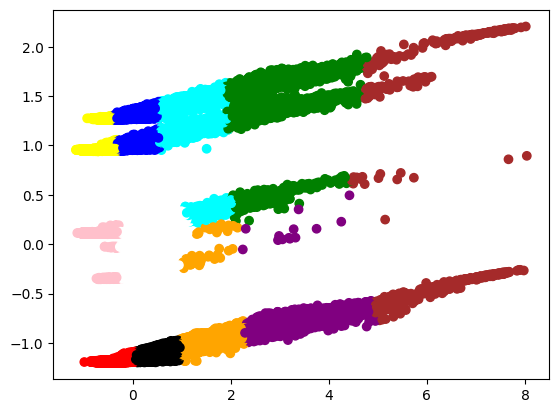

In [15]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
ax.scatter(dataset['principal_feature1'], dataset['principal_feature2'], c=dataset["cluster"].apply(lambda x: colors[x]))
plt.show()

In [20]:
# An estimation of anomly population of the dataset
outliers_fraction = 0.01

In [21]:
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[14])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()

/tmp/ipykernel_211472/633941868.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  distance = pd.Series()


In [22]:
anomaly = pd.DataFrame(distance.apply(lambda x: x >= threshold).astype(int), columns=['anomaly'])
anomaly= anomaly.set_index(dataset.index)

In [23]:
### merge dataset with the cluster, pca-1, pca-2 and anomaly
ress = pd.concat([dataset, anomaly], axis=1, join="inner")
ress

,Id,ActivityMinute,Calories,Steps,Heartrate,is_morning,is_daytime,is_evening,is_sleep,cluster,principal_feature1,principal_feature2,anomaly
0,2022484408,2016-04-12 07:21:00,3.32064,17,97.0,1,0,0,0,6,0.682838,1.062160,0
1,2022484408,2016-04-12 07:23:00,1.34901,0,60.0,1,0,0,0,7,-0.753331,0.958633,0
2,2022484408,2016-04-12 07:24:00,1.03770,0,58.0,1,0,0,0,7,-0.858807,0.948992,0
3,2022484408,2016-04-12 07:26:00,2.49048,7,53.0,1,0,0,0,7,-0.553457,1.009952,0
4,2022484408,2016-04-12 07:27:00,1.03770,0,53.0,1,0,0,0,7,-0.962115,0.948681,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200068,8877689391,2016-05-12 12:23:00,8.24364,97,100.0,0,1,0,0,9,3.288508,-0.735807,0
200069,8877689391,2016-05-12 12:24:00,8.24364,101,97.0,0,1,0,0,9,3.288967,-0.726358,0
200070,8877689391,2016-05-12 12:25:00,7.75872,101,93.0,0,1,0,0,9,3.106390,-0.741430,0
200071,8877689391,2016-05-12 13:54:00,1.33353,0,63.0,0,1,0,0,0,-0.414228,-1.183014,0


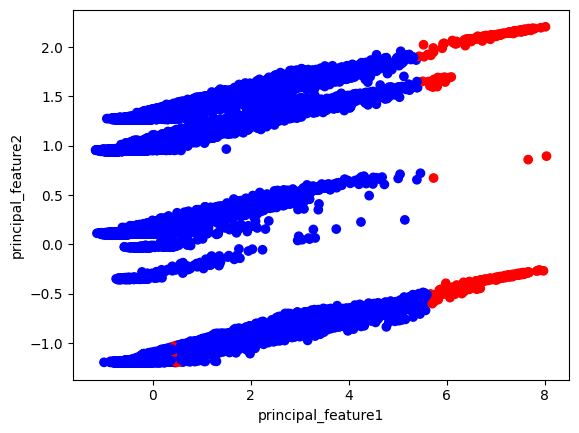

In [29]:
# visualisation of anomaly with cluster view
fig, ax = plt.subplots()
colors = {0:'blue', 1:'red'}
ax.scatter(x=ress['principal_feature1'], y=ress['principal_feature2'], c=ress["anomaly"].apply(lambda x: colors[x]))
ax.set_xlabel("principal_feature1")
ax.set_ylabel("principal_feature2")
plt.show()

In [26]:
ress.anomaly.value_counts()

0    198073
1      2000
Name: anomaly, dtype: int64